In [2]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

(189, 1024)
Filtered rows with standard deviation greater than 5:
[[1583 1585 1582 ... 1588 1588 1589]
 [1585 1038  826 ... 1590 1588 1590]
 [1589 1585 1582 ... 1581 1583 1580]]


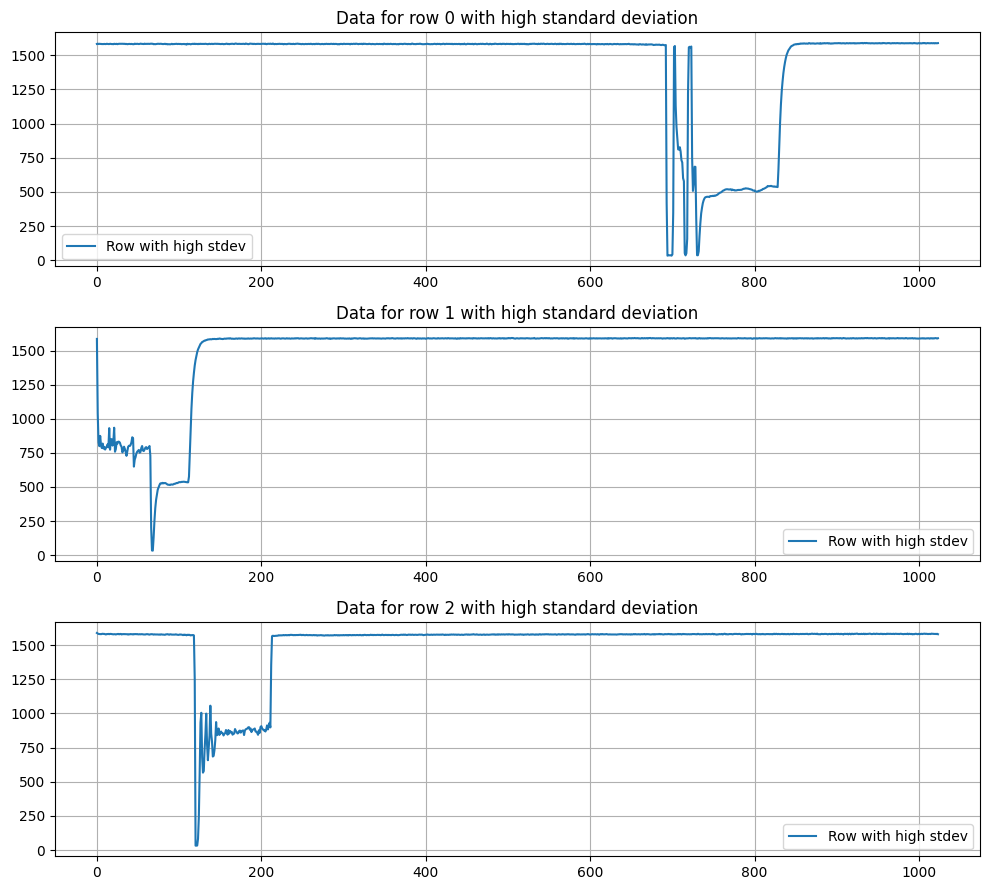

In [13]:
file_path = "./log.txt"

# log.txt looks like this:
# ```
# [1332, 3423, 4323, 4324]
# [1231, 1231, 1231, 1231]
# [1231, 1231, 1231, 1231]
# ```

# We need to read this into a 2d numpy array

# Read the data from the file
with open(file_path, "r") as file:
    data_lines = file.readlines()

# Convert the data from string format to a list of lists of integers
data_array = [list(map(int, line.strip()[1:-1].split(', '))) for line in data_lines]

# Convert the list of lists into a 2D numpy array
data_np_array = np.array(data_array)

print(data_np_array.shape)
data_np_array.std(axis=1)

# Filter for rows that have stdev > 5
high_std_dev_rows = data_np_array[data_np_array.std(axis=1) > 5]
print("Filtered rows with standard deviation greater than 5:")
print(high_std_dev_rows)


# Plot the local regions around each high standard deviation row
fig, axs = plt.subplots(len(high_std_dev_rows), 1, figsize=(10, len(high_std_dev_rows) * 3))

for i, row in enumerate(high_std_dev_rows):
    axs[i].plot(row, label=f"Row with high stdev")
    axs[i].set_title(f"Data for row {i} with high standard deviation")
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

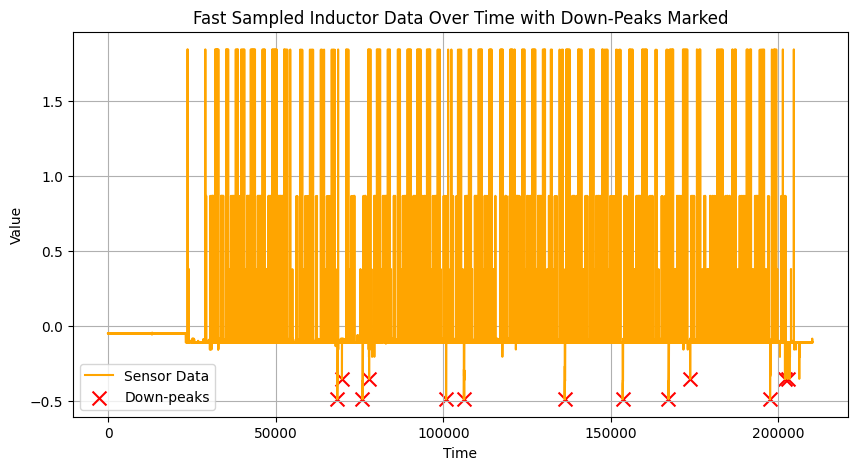

(21,
 array([ 30387,  32847,  68404,  69779,  75911,  77891,  78083,  78776,
        100858, 106137, 117635, 121657, 136287, 153495, 167185, 171651,
        173662, 197499, 200433, 201925, 202694]))

In [34]:
# Load the new data from the provided file
file_path = "/Users/cobular/Downloads/even_faster_log.txt"

# Read the data
with open(file_path, "r") as file:
    inductor_data = file.readlines()

# Convert the data to a list of integers
inductor_data = [int(line.strip()) for line in inductor_data if line.strip().isdigit()]

# Convert to numpy array for easier processing
inductor_data_array = (np.array(inductor_data) - 2048)/4096

# Invert the data to find the down-peaks
inverted_inductor_data = -inductor_data_array

# Adjust the parameters to find around 10-20 significant down-peaks
inductor_peaks, _ = find_peaks(inverted_inductor_data, prominence=2, distance=50)

filtered_peaks = [peak for peak in inductor_peaks if inductor_data_array[peak] < -0.3]

# Plot the overall data with down-peaks marked
plt.figure(figsize=(10, 5))
plt.plot(inductor_data_array, label="Sensor Data", color="orange")
plt.scatter(filtered_peaks, inductor_data_array[filtered_peaks], color="red", marker='x', s=100, label="Down-peaks")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Fast Sampled Inductor Data Over Time with Down-Peaks Marked")
plt.legend()
plt.grid(True)
plt.show()

# Print the number of identified down-peaks for confirmation
len(inductor_peaks), inductor_peaks


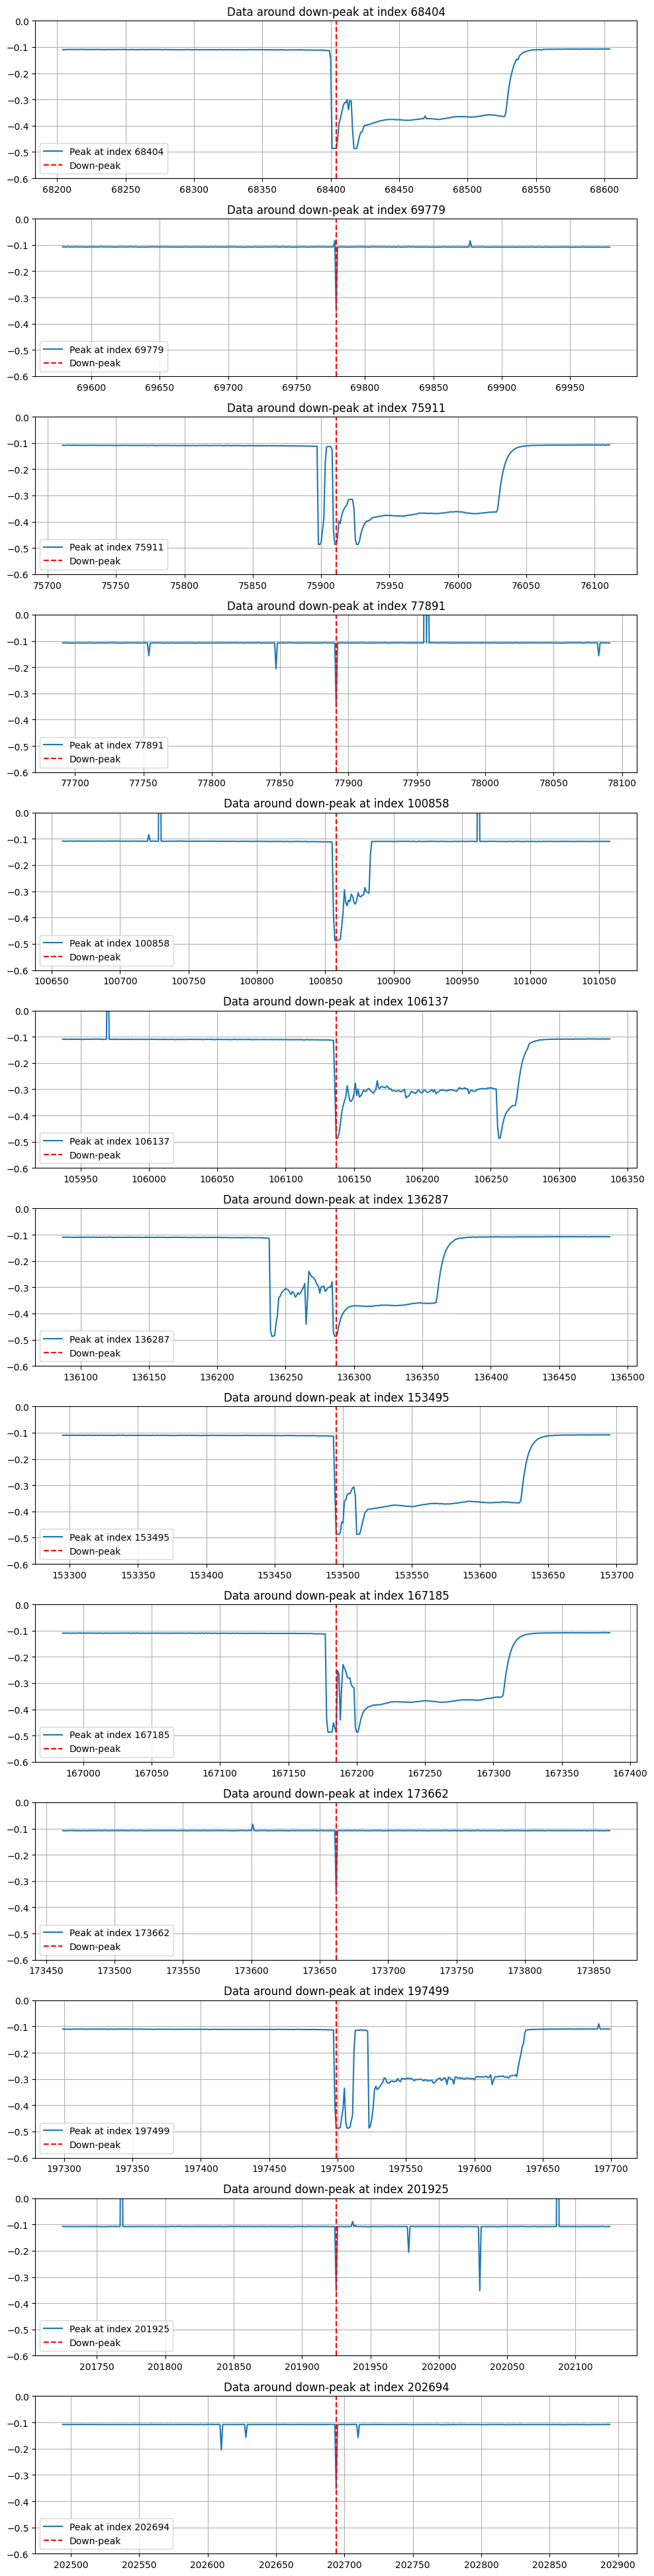

In [35]:

# Define the number of samples to include on each side of the peak
samples_per_side = 200

# Plot the local regions around each filtered down-peak (20 samples on each side)
fig, axs = plt.subplots(len(filtered_peaks), 1, figsize=(10, len(filtered_peaks) * 3))

for i, peak in enumerate(filtered_peaks):
    start_index = max(0, peak - samples_per_side)
    end_index = min(len(inductor_data_array), peak + samples_per_side + 1)
    axs[i].plot(range(start_index, end_index), inductor_data_array[start_index:end_index], label=f"Peak at index {peak}")
    axs[i].axvline(x=peak, color='r', linestyle='--', label='Down-peak')
    axs[i].set_title(f"Data around down-peak at index {peak}")
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_ylim(-0.6, 0)  # Set the y-axis limits from 0 to 1700

plt.tight_layout()
plt.show()